# Table of Contents

* [Unpload the dataset / select the right dataset](#Section-one)
* [Clean the dataset](#Section-two)
     * [Remove duplicated entries](#subsection-one-of-section-2)
     * [Split the dataframe based on the platform](#subsection-two-of-section-2)
* [Exploratory data analys](#Section-three)
     * [How many many Twitter, Instagram, and Facebook data the dataset has?](#subsection-one-of-section-3)
         *[Regration model](#subsubsection-one-of-section-3)
     * [Is it a relation between Likes and Retweets?](#subsection-two-of-section-3)
     * [How many likes people n different countries give?](#subsection-three-of-section-3)
     * [What emotions have the posts with the most likes?](#subsection-four-of-section-3)
     * [Do people post more often positive, negative or neutral text?](#subsection-five-of-section-3)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from nrclex import NRCLex
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

<a id="Section-one" ></a>
# <span style="color:green">Stection 1 - Upload the dataset / select the right dataset</span> 
​
* Upload the dataset, we will use sentimentdataset from kaggle
` https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/data`
​
* The data set contains social media data from different platforms and different countries 

In [3]:
df=pd.read_csv("/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv")

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
df.shape

(732, 15)

<a id="Section-two" ></a>
# <span style="color:green">Section 2 - Clean the dataset</span> 

#### In the "object" type data there is no consisted text gaps. This can be an issue in data cleaning. Steps to handle this:
 
* Select the columns that have "object" as a type.
* Remove gaps from only the "object" type columns.
* Remove dumplicated entries. Dumplicated are difined as: 
    1. Same text post and,
    2. from the same user and,
    3. in the same platform and,
    4. at the exact same time

### Remove gaps from "object" type columns

In [7]:
df_features = df.select_dtypes(include=[object])

list(df_features.columns)

['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Country']

In [8]:
df[list(df_features.columns)] = df[list(df_features.columns)].replace(r'\s+', '', regex=True)

<a id="subsection-one-of-section-2" ></a>

### Remove duplicated entries

In [9]:
# Use duplicated pandas method

len_duplicated = len(df[df.duplicated(subset=['Text','Timestamp', 'Platform'])])

In [10]:
len(df) - len_duplicated

709

In [11]:
# Rename pudlicated entries and save to a new dataframe

no_duplicated = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')

In [12]:
# Check the lengths to be sure that the cleaning is done correctly

len(no_duplicated)

709

<a id="subsection-two-of-section-2" ></a>

### Split the dataframe based on the platform

In [13]:
no_duplicated['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

In [14]:
twitter = no_duplicated[no_duplicated["Platform"] == 'Twitter']
instagram = no_duplicated[no_duplicated["Platform"] == 'Instagram']
facebook = no_duplicated[no_duplicated["Platform"] == 'Facebook']

<a id="Section-three" ></a>
# <span style="color:green">Section 3 - Exploratory data analysis</span> 

<a id="subsection-one-of-section-3" ></a>
## 1. How many many Twitter, Instagram, and Facebook data the dataset has? 

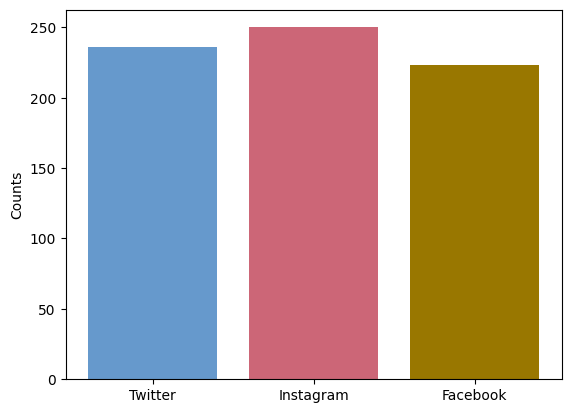

In [15]:
plt.bar(['Twitter', 'Instagram', 'Facebook'], 
        [twitter['Text'].count(), instagram['Text'].count(), facebook['Text'].count()], 
        color=["#6699CC", '#CC6677', '#997700'])
plt.ylabel('Counts')
plt.show()

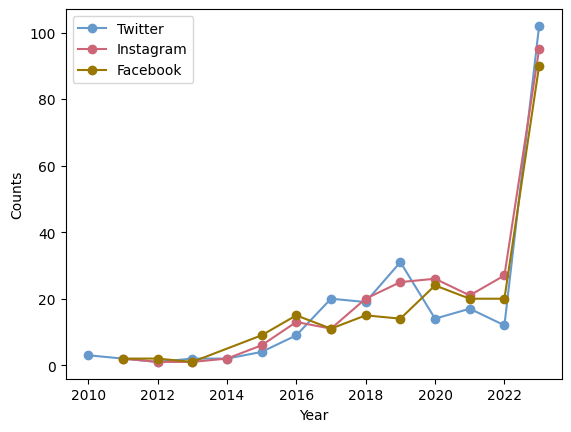

In [16]:
plt.plot(twitter.groupby(['Year']).Platform.count(), color= "#6699CC", marker ='o', label='Twitter')
plt.plot(instagram.groupby(['Year']).Platform.count(), color= "#CC6677", marker ='o', label='Instagram')
plt.plot(facebook.groupby(['Year']).Platform.count(), color= "#997700", marker ='o', label='Facebook')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()

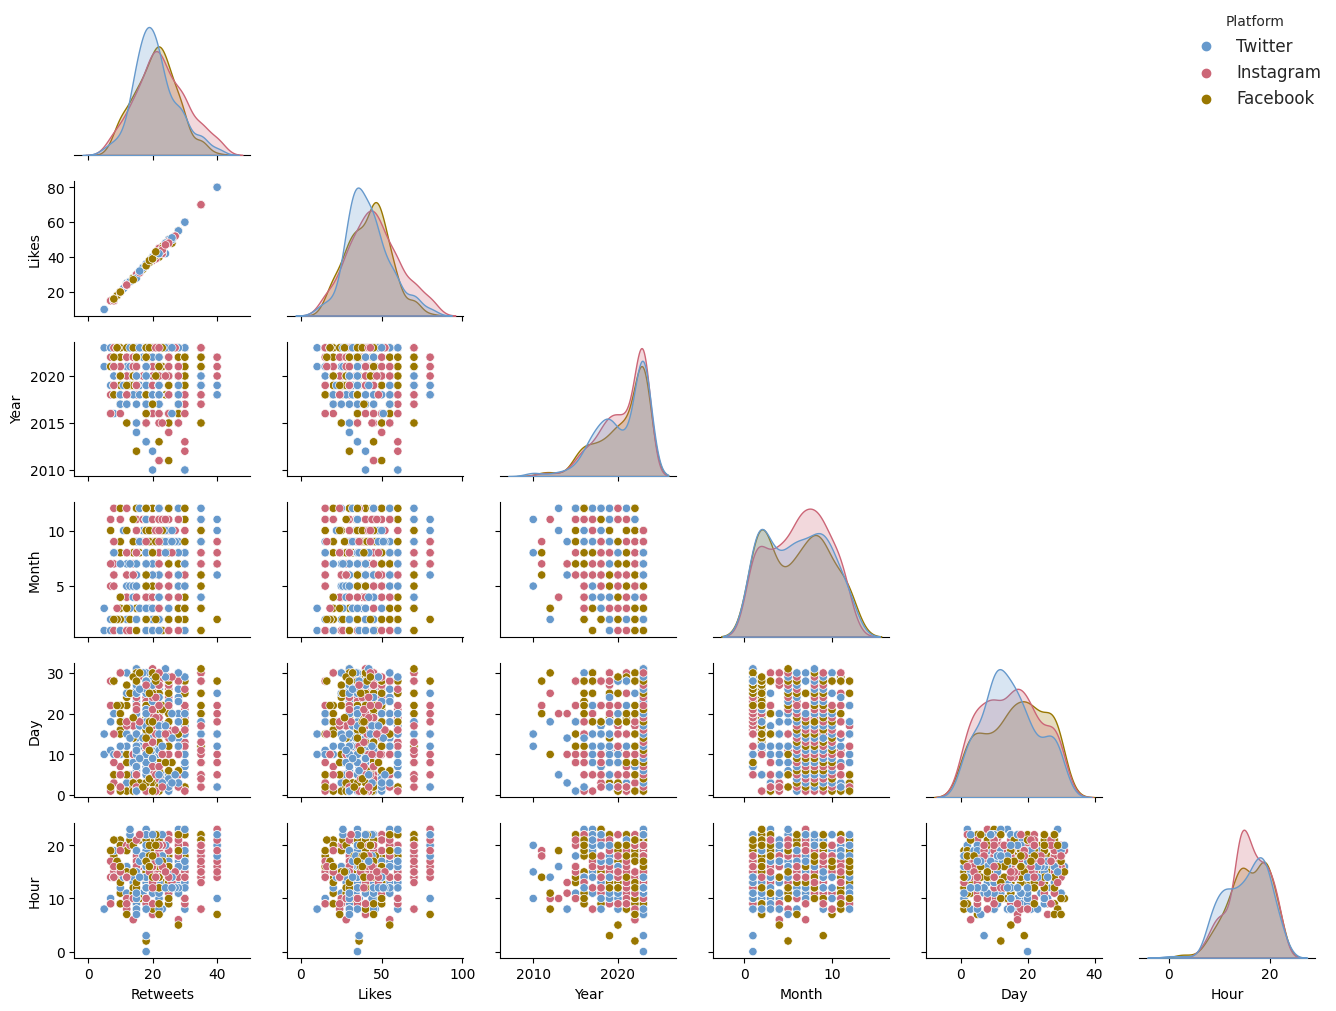

In [17]:
ax = sns.pairplot(no_duplicated[['Platform', 'Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']], 
                  hue = 'Platform',
                  palette={"Twitter": "#6699CC", "Instagram": "#CC6677", "Facebook": "#997700"},
                  corner=True, height=1.7, aspect=1.2)
sns.set(font_scale=1.1)
sns.move_legend(ax, "upper right") 
plt.tight_layout()
plt.show()

<a id="subsection-two-of-section-3" ></a>
## 2. Is it a relation between Likes and Retweets?

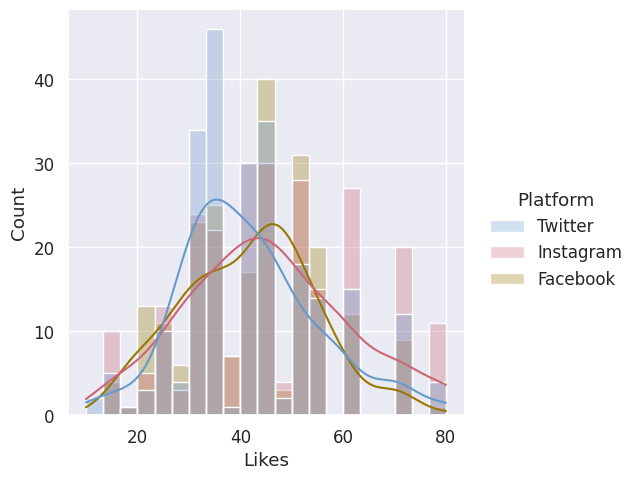

In [18]:
sns.displot(data=no_duplicated[['Platform','Likes']], x="Likes", hue="Platform", 
            palette = ["#6699CC", '#CC6677', '#997700'], 
            alpha=0.3,
           # multiple='dodge',
           # multiple='stack',
            kde=True)
plt.show()

<a id="subsubsection-one-of-section-3" ></a>
### Regration model - Prediction of number of retweets 

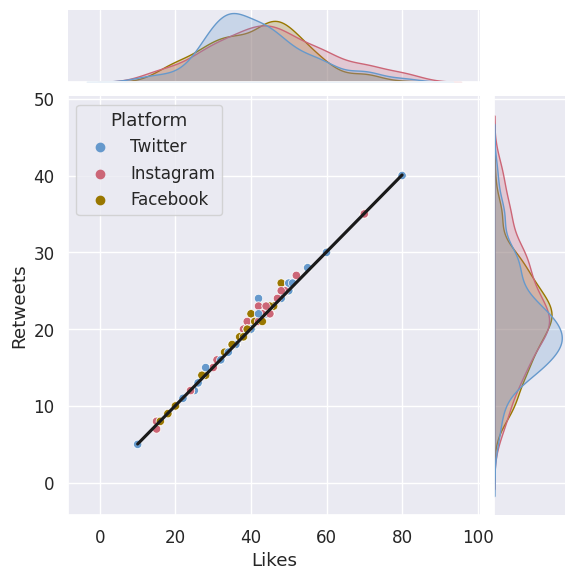

In [19]:
g = sns.jointplot(data=no_duplicated, x="Likes", y="Retweets", hue='Platform', 
                  palette={"Twitter": "#6699CC", "Instagram": "#CC6677", "Facebook": "#997700"}, kind="scatter")
g1 = sns.regplot(data=no_duplicated, x="Likes", y="Retweets", 
                 scatter=False, ax=g.ax_joint)
#g1 = sns.regplot(data=twitter, x="Likes", y="Retweets", scatter=False, ax=g.ax_joint, line_kws={'linewidth':15, 'ls': '--'})
#g2 = sns.regplot(data=facebook, x="Likes", y="Retweets", scatter=False, ax=g.ax_joint, line_kws={'linewidth':5, 'ls': '-.'})
#g3 = sns.regplot(data=instagram, x="Likes", y="Retweets", scatter=False, ax=g.ax_joint)

regline1 = g1.get_lines()[0]
regline1.set_color('k')
regline1.set_zorder(5)

#regline2 = g2.get_lines()[0]
#regline2.set_color('blue')
#regline2.set_zorder(5)

#regline3 = g3.get_lines()[0]
#regline3.set_color('orange')
#regline3.set_zorder(5)

plt.show()

### Regression formula

In [20]:
model = linear_model.LinearRegression()

# Train the model using the training sets
x = no_duplicated['Likes'].values.reshape((-1, 1))
y = no_duplicated['Retweets'].values

model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
m = model.coef_[0]
b = model.intercept_

#print(f"intercept: {model.intercept_}")
#print(f"slope: {model.coef_}")
print()
print(f"Regression: y =  {model.intercept_} + {model.coef_[0]} x")

coefficient of determination: 0.9969381166021544

Regression: y =  0.0426070750786991 + 0.5003703494299322 x


### Prediction

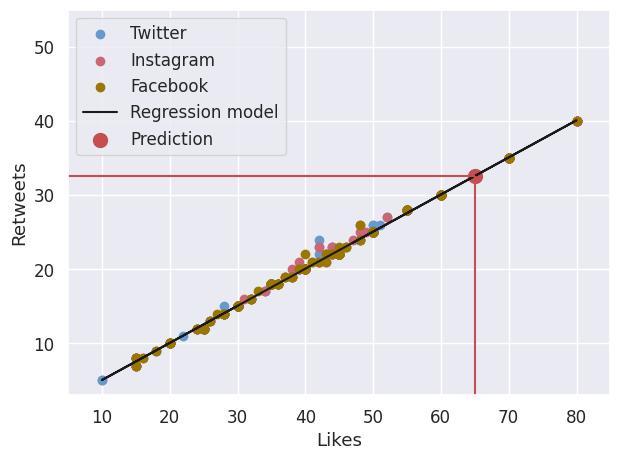

In [21]:
x_pred = 65
plt.scatter(twitter['Likes'], twitter['Retweets'], color='#6699CC', label='Twitter')
plt.scatter(instagram['Likes'], instagram['Retweets'], color='#CC6677', label='Instagram')
plt.scatter(facebook['Likes'], facebook['Retweets'], color='#997700', label='Facebook')

plt.plot(no_duplicated['Likes'], m*no_duplicated['Likes'] + b, 'k', label='Regression model')

plt.scatter(x_pred, model.predict(np.array([[x_pred]]))[0], color = 'r', s=100, label='Prediction')
plt.vlines(x = x_pred, ymin=3, ymax= model.predict(np.array([[x_pred]]))[0], color = 'r', linestyle = '-') 
plt.hlines(y = model.predict(np.array([[x_pred]]))[0], xmin= 5, xmax= x_pred, color = 'r', linestyle = '-')
plt.xlim([5, 85])
plt.ylim([3, 55])
plt.legend(loc='best')

plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.tight_layout()
plt.show()

<a id="subsection-three-of-section-1" ></a>
## 3. How many likes people n different countries give

In [22]:
no_duplicated.groupby(['Country']).Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Country,,,
USA,184,10.0,80.0
UK,140,15.0,70.0
Canada,131,10.0,80.0
Australia,70,15.0,80.0
India,67,15.0,80.0
Brazil,17,30.0,80.0
France,16,35.0,60.0
Japan,15,35.0,70.0
Germany,14,30.0,70.0


In [23]:
no_duplicated.groupby(['Country']).Likes.sum().sort_values(ascending=False)

Country
USA              8184.0
UK               5727.0
Canada           5340.0
Australia        2722.0
India            2581.0
Brazil            900.0
Japan             785.0
France            740.0
Germany           675.0
Italy             515.0
SouthAfrica       430.0
Greece            220.0
Netherlands       215.0
Spain             215.0
Sweden            140.0
Belgium           140.0
Switzerland       105.0
Denmark            80.0
CzechRepublic      70.0
Thailand           70.0
Jordan             60.0
Jamaica            60.0
Peru               55.0
Portugal           55.0
Colombia           55.0
Ireland            50.0
Norway             45.0
Scotland           45.0
Maldives           45.0
Kenya              45.0
Austria            45.0
Cambodia           40.0
China              35.0
Name: Likes, dtype: float64

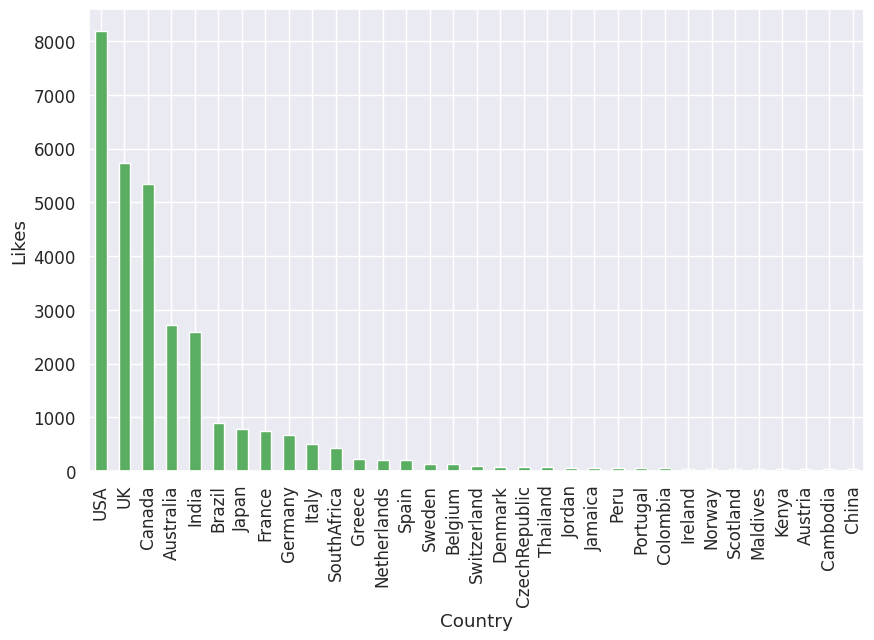

In [24]:
likes_per_country = no_duplicated.groupby(['Country']).Likes.sum().sort_values(ascending=False)

likes_per_country.plot(kind='bar', color = '#5AAE61', figsize=(10, 6) )
plt.ylabel('Likes')
plt.show()

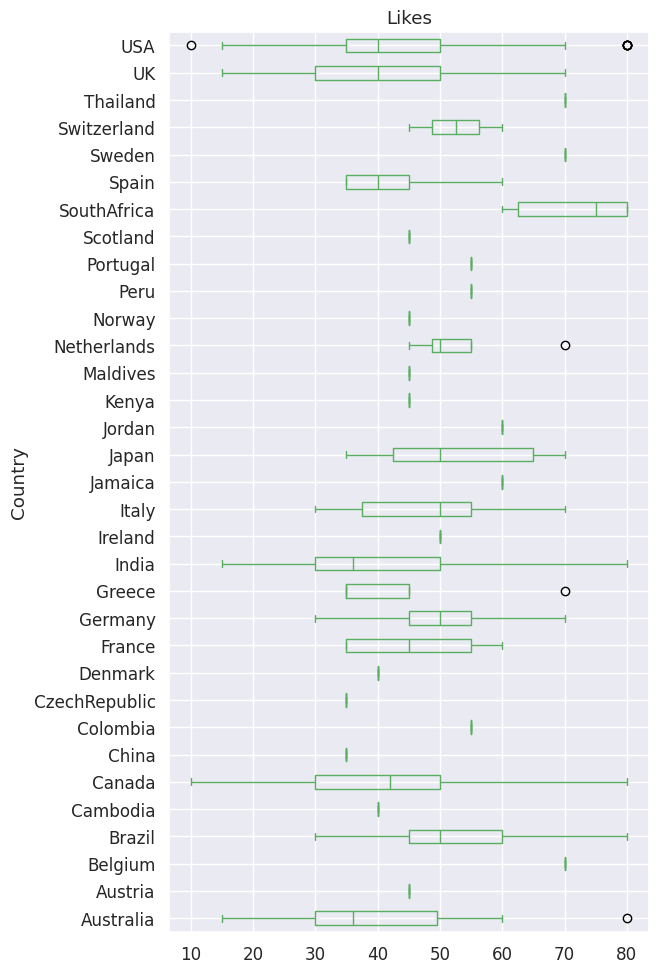

In [25]:
ax = no_duplicated.boxplot(column='Likes', by='Country', 
                           #rot=90, 
                           color= '#5AAE61',
                           vert=False, 
                           figsize=(6, 12) )
ax.get_figure().suptitle("")
plt.show()

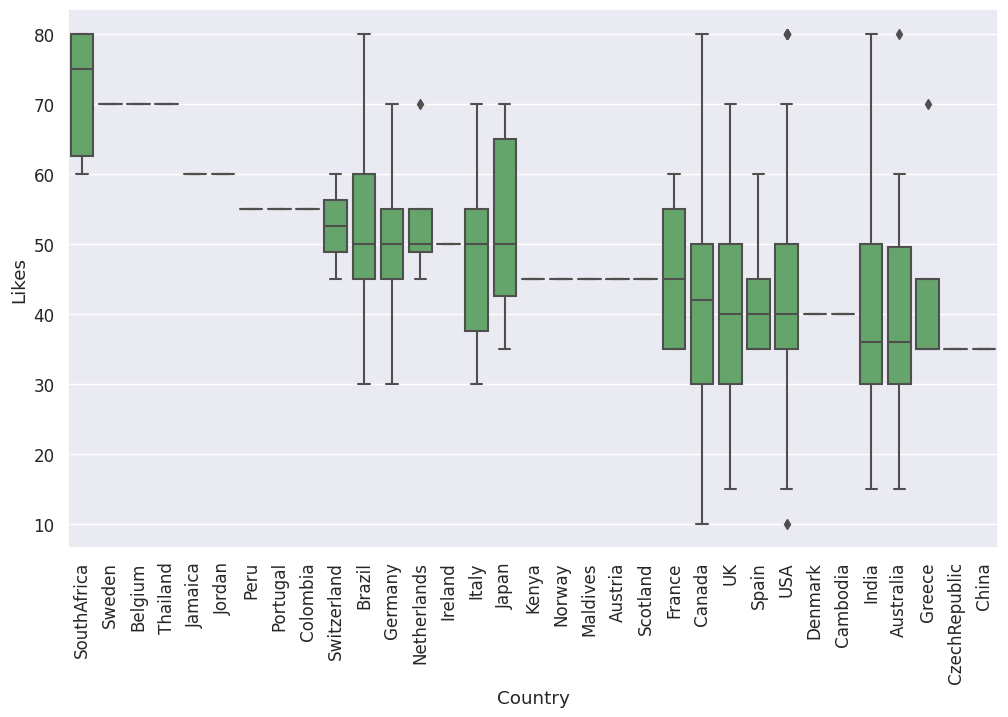

In [26]:
order = no_duplicated.groupby(['Country']).Likes.median().sort_values(ascending=False).index

plt.figure(figsize=(12,7))
g = sns.boxplot(data=no_duplicated, x='Country', y='Likes', 
                color ='#5AAE61',
                order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

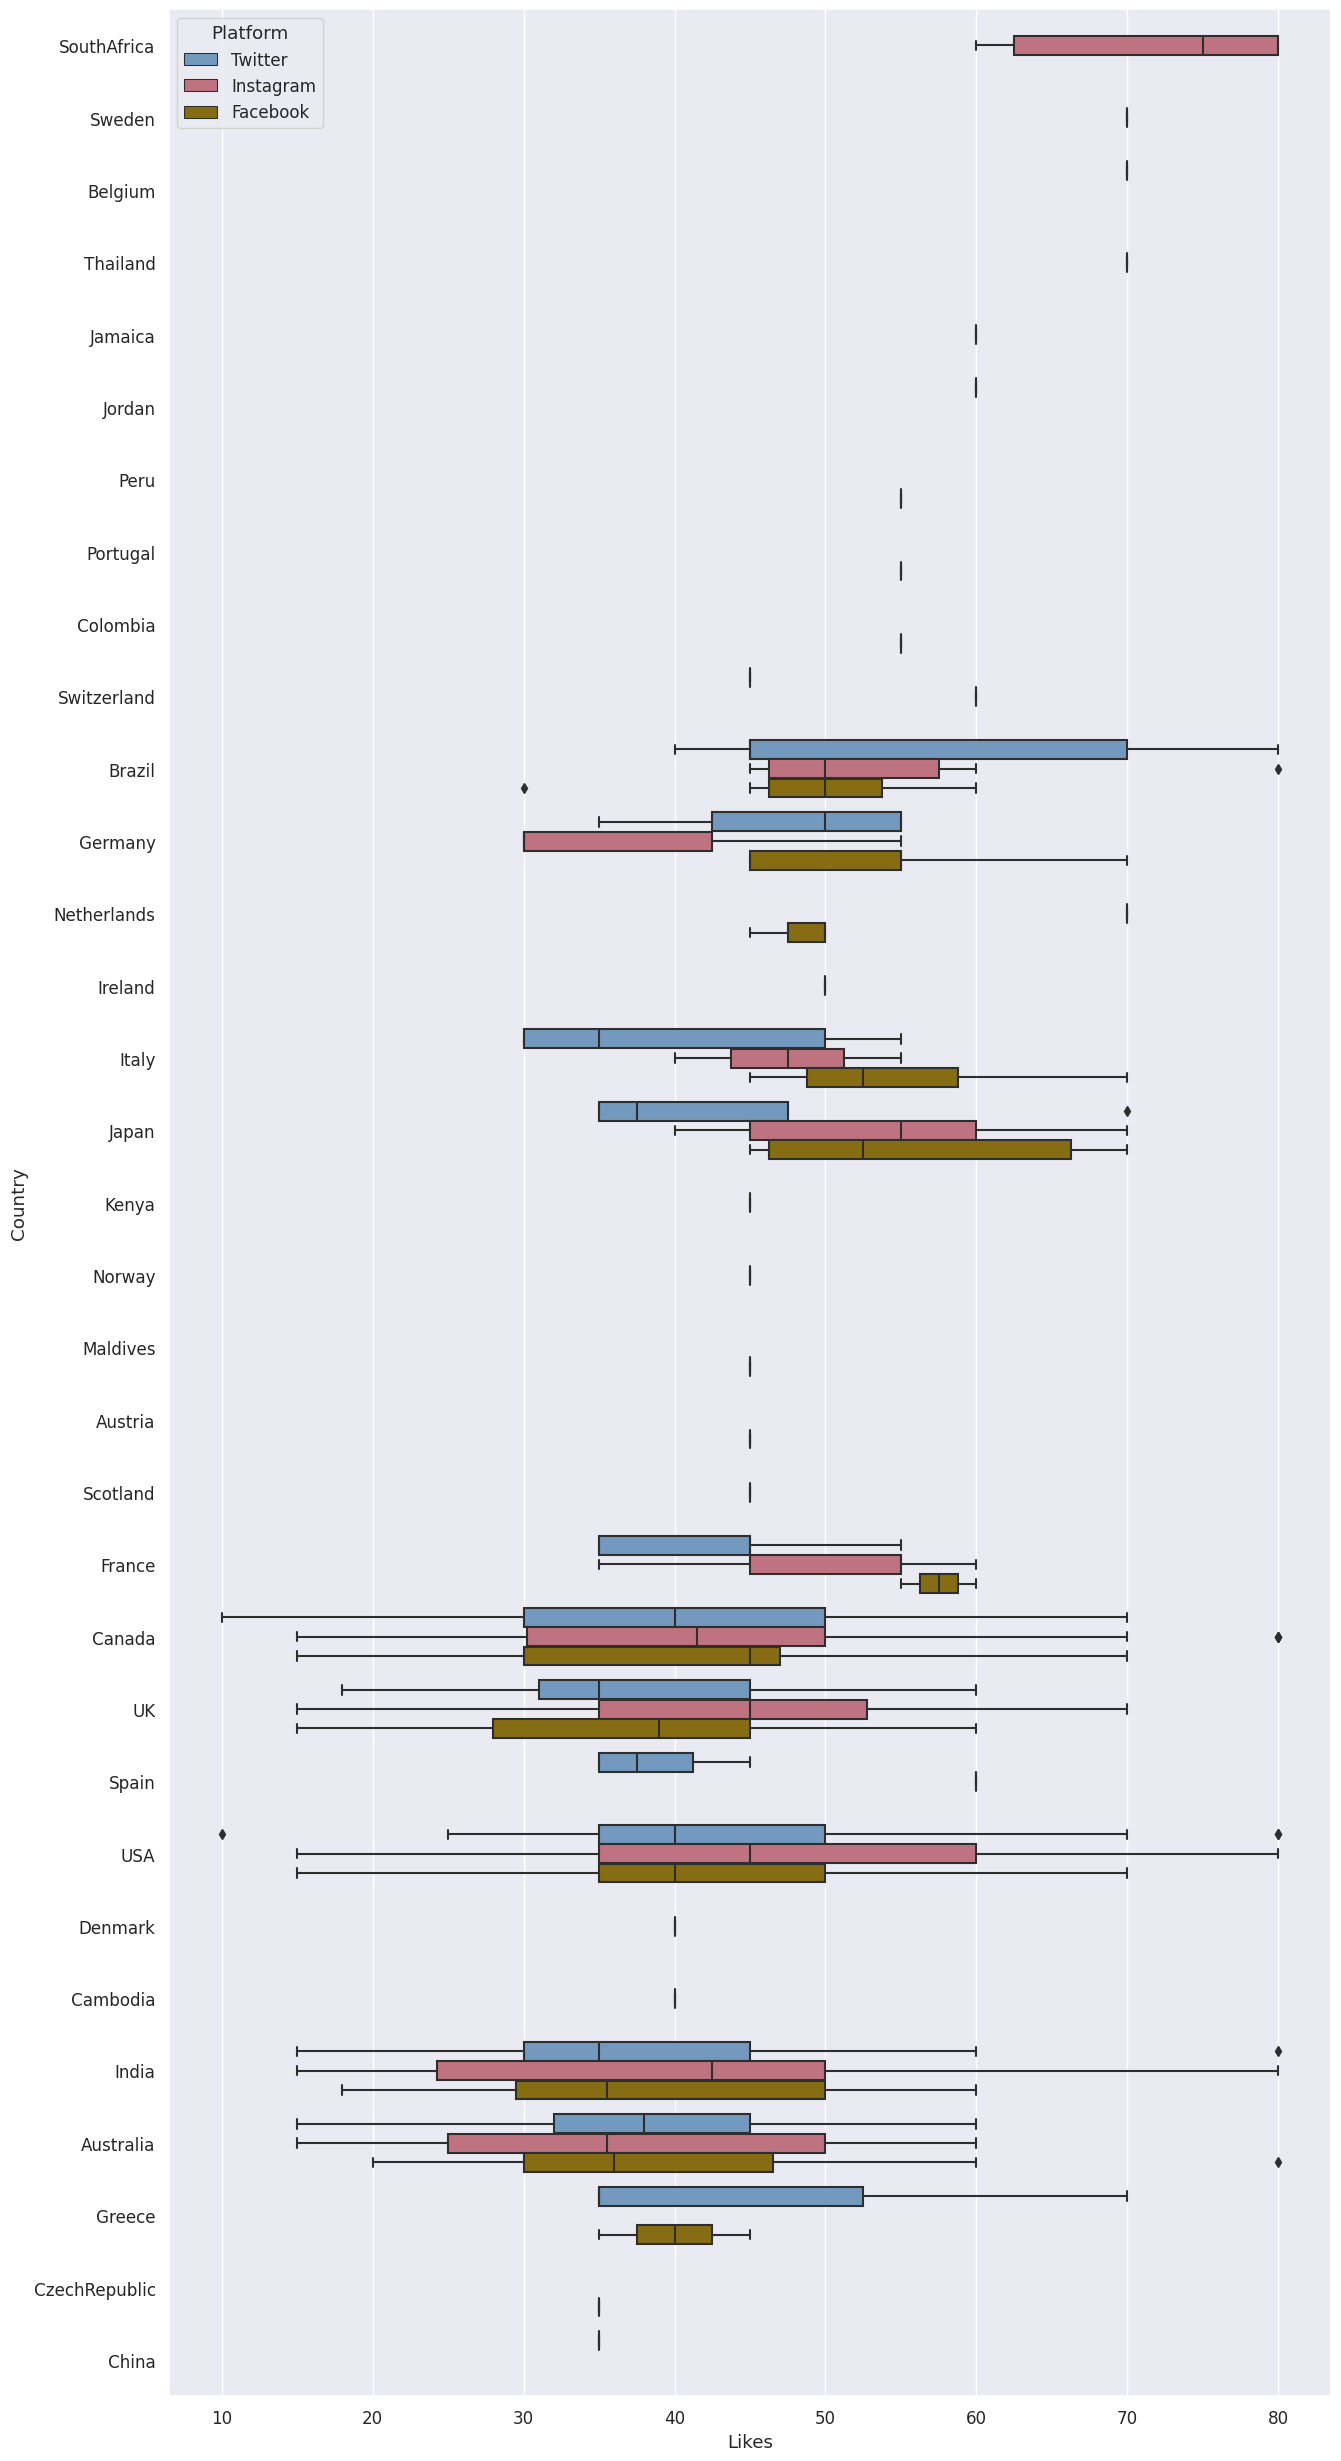

In [27]:
order = no_duplicated.groupby(['Country']).Likes.median().sort_values(ascending=False).index

plt.figure(figsize=(15,31))
g = sns.boxplot(data=no_duplicated, y='Country', x='Likes', hue='Platform', 
                palette={"Twitter": "#6699CC", "Instagram": "#CC6677", "Facebook": "#997700"},
                order=order)
#g.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<a id="subsection-four-of-section-3" ></a>
## 4. What emotions have the posts with the most likes?

In [28]:
no_duplicated.groupby('Sentiment').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)

,len,min,max
Sentiment,,,
Positive,45,15.0,60.0
Joy,44,30.0,80.0
Excitement,37,30.0,80.0
Contentment,18,35.0,70.0
Neutral,18,25.0,50.0
Gratitude,17,30.0,70.0
Curiosity,16,30.0,60.0
Serenity,15,25.0,55.0
Happy,14,38.0,52.0


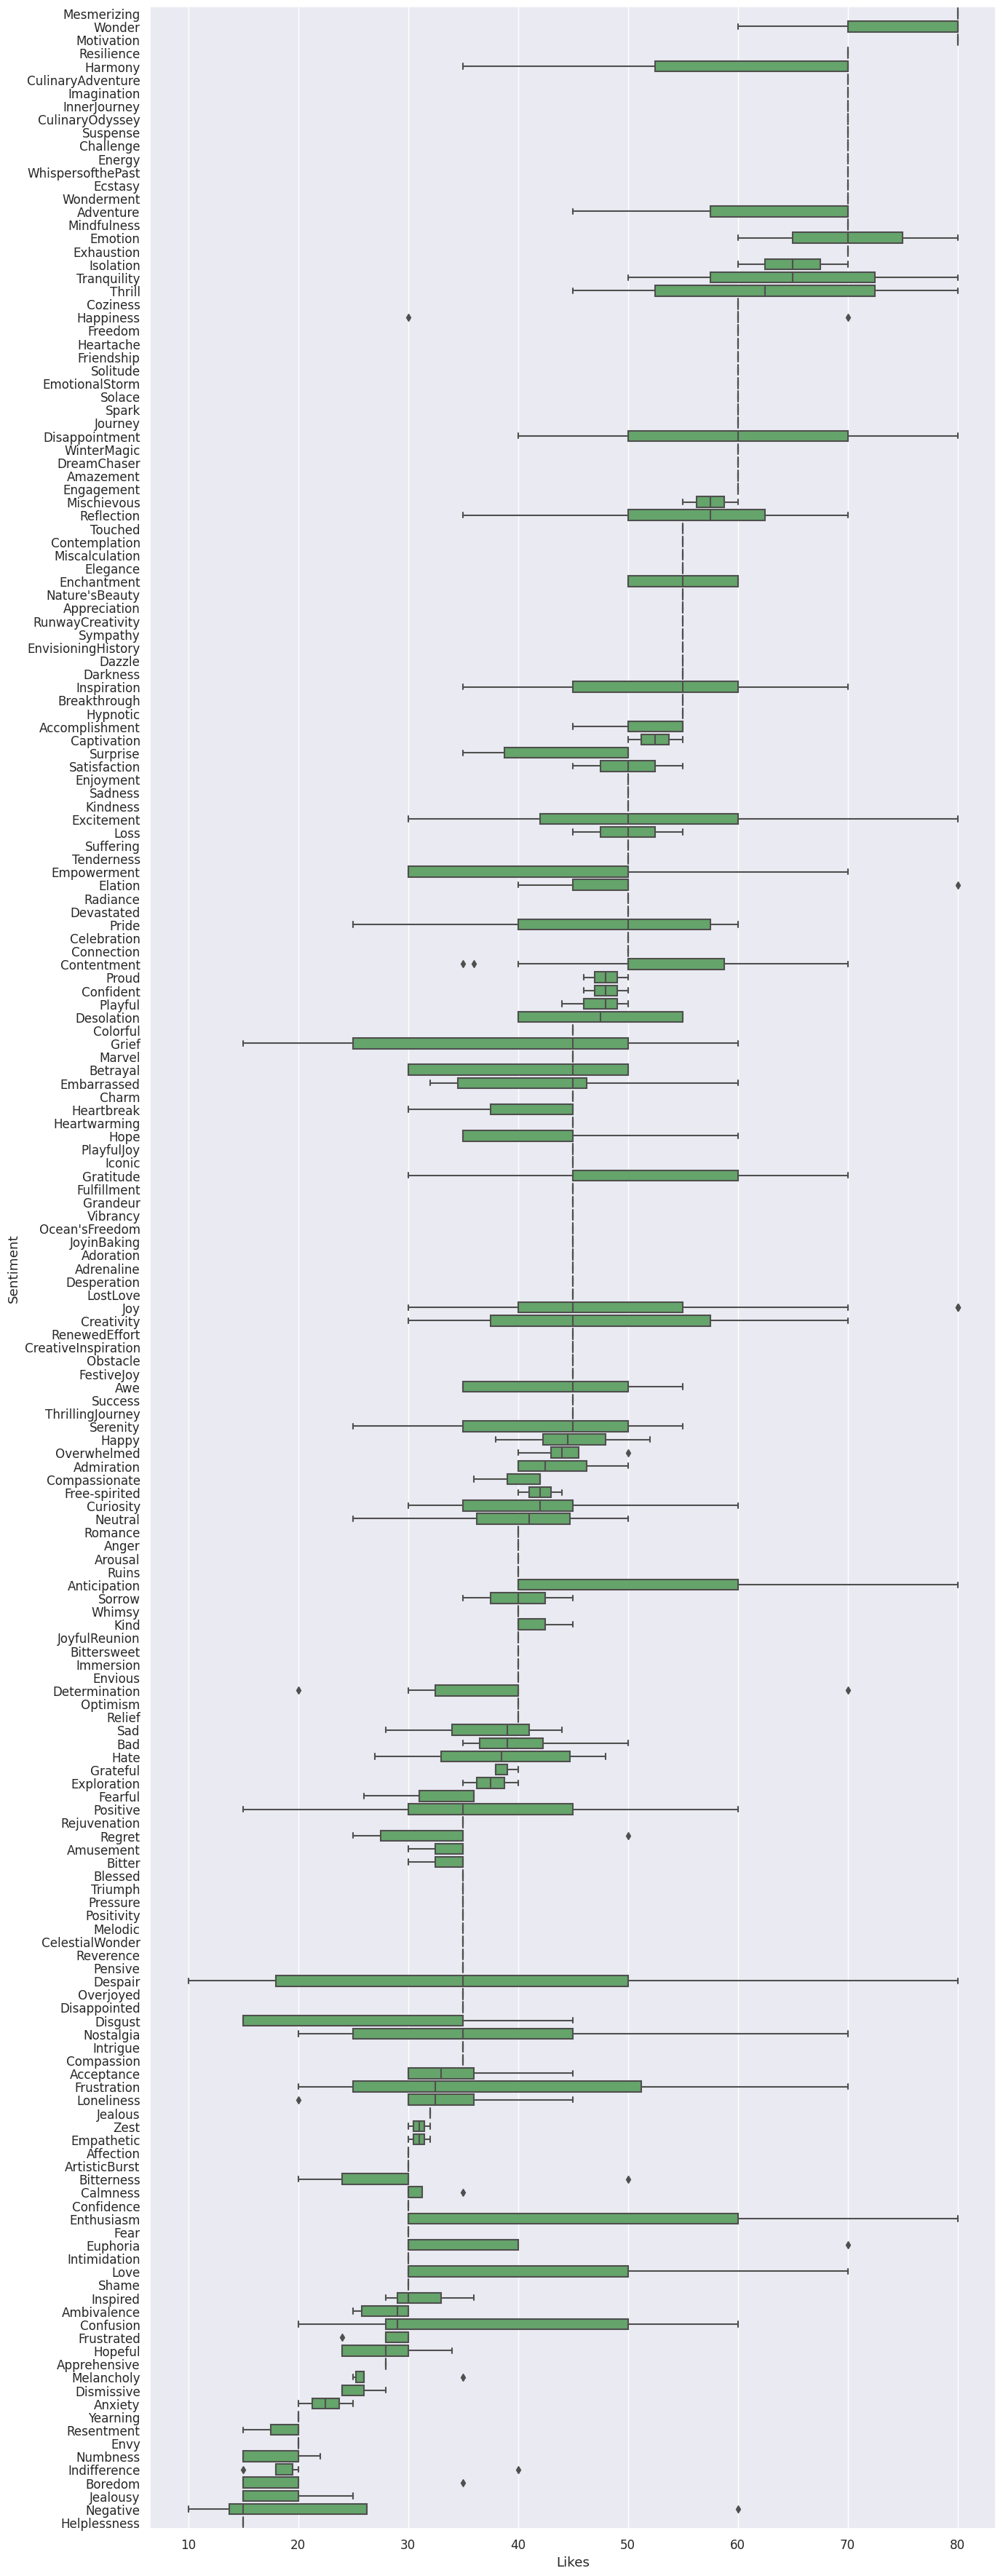

In [29]:
order = no_duplicated.groupby(['Sentiment']).Likes.median().sort_values(ascending=False).index

plt.figure(figsize=(15,45))
g = sns.boxplot(data=no_duplicated, y='Sentiment', x='Likes', color='#5AAE61', order=order)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

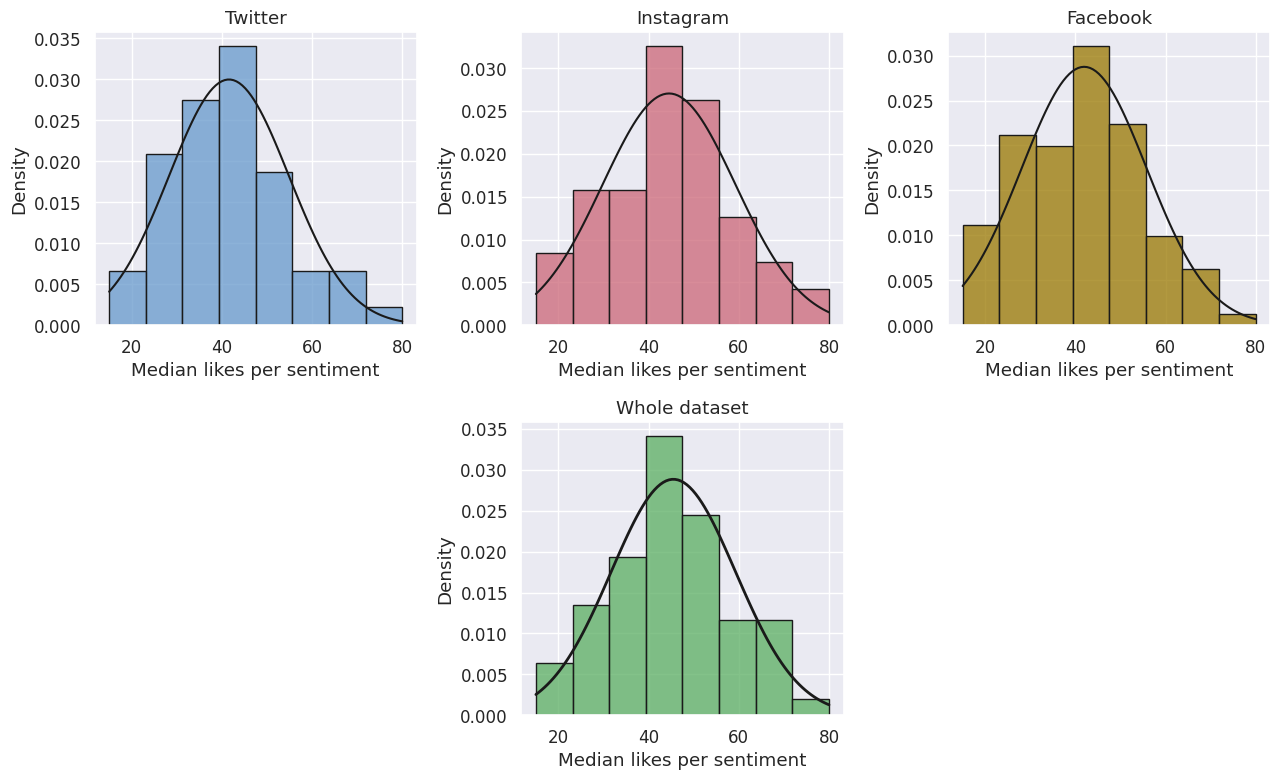

In [30]:
plt.figure(figsize=(13,8))
plt.subplot(2, 3, 1)
mu, std = norm.fit(twitter.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(twitter.groupby('Sentiment').Likes.median()), min(twitter.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p_twitter = norm.pdf(x, mu, std)

ax1 = sns.histplot(twitter.groupby('Sentiment').Likes.median(), 
                   bins=8, color='#6699CC',edgecolor='k',kde=False, stat= 'density')
plt.plot(x, p_twitter, c='k')
ax1.set_title('Twitter')
ax1.set_xlabel('Median likes per sentiment')
#############################
plt.subplot(2, 3, 2)

mu, std = norm.fit(instagram.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(instagram.groupby('Sentiment').Likes.median()), min(instagram.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p_instagram = norm.pdf(x, mu, std)

ax2 = sns.histplot(instagram.groupby('Sentiment').Likes.median(), 
                   color='#CC6677',edgecolor='k',kde=False, stat= 'density')
plt.plot(x, p_instagram, c='k')
ax2.set_xlabel('Median likes per sentiment')
ax2.set_title('Instagram')
##############################
plt.subplot(2, 3, 3)

mu, std = norm.fit(facebook.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(facebook.groupby('Sentiment').Likes.median()), min(facebook.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p_facebook = norm.pdf(x, mu, std)

ax3 = sns.histplot(facebook.groupby('Sentiment').Likes.median(), 
                   color='#997700',edgecolor='k',kde=False, stat= 'density')
plt.plot(x, p_facebook, c='k')
ax3.set_xlabel('Median likes per sentiment')
ax3.set_title('Facebook')
##############################
plt.subplot(2, 3, 5)

mu, std = norm.fit(no_duplicated.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(no_duplicated.groupby('Sentiment').Likes.median()), min(no_duplicated.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

ax4 = sns.histplot(no_duplicated.groupby('Sentiment').Likes.median(), 
             bins=8, color='#5AAE61',edgecolor='k',kde=False, stat= 'density')
plt.plot(x, p, 'k', linewidth=2)
ax4.set_title('Whole dataset')
ax4.set_xlabel('Median likes per sentiment')

plt.tight_layout()

In [31]:
most_likes_sentiment = {'Whole':[], 'Twitter':[], 'Facebook':[], 'Instagram':[]}

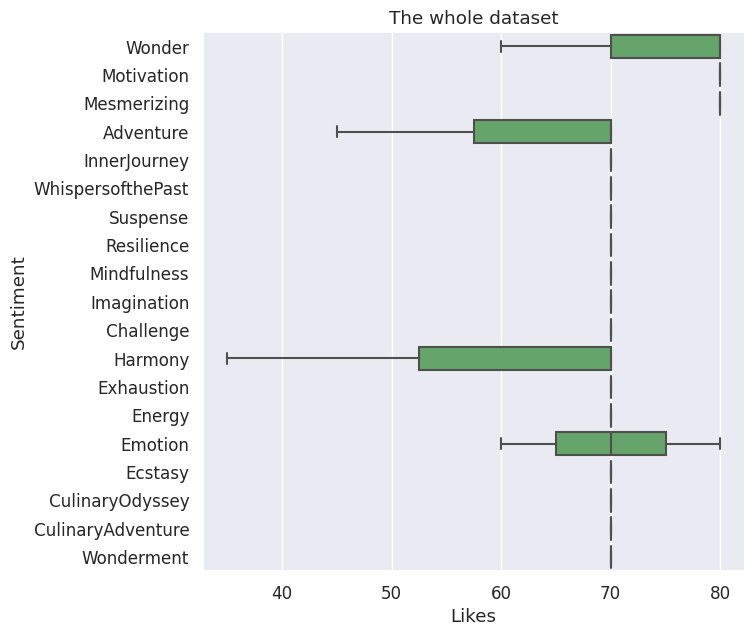

In [32]:
mean = mu
standard_deviation = std

distribution = norm(loc=mean, 
                    scale=standard_deviation)

len_sentiment = no_duplicated.groupby('Sentiment').Likes.median().sort_values(ascending=False)
for sentiment, value in np.array([len_sentiment.index, len_sentiment.values]).T:
    if float(value) > distribution.ppf(0.9544):
        most_likes_sentiment['Whole'].append(sentiment)
        
most_likes_sentiment_db = no_duplicated[no_duplicated['Sentiment'].isin(most_likes_sentiment['Whole'])]
order_whole = most_likes_sentiment_db.groupby(['Sentiment']).Likes.median().sort_values(ascending=False).index

plt.figure(figsize=(7,7))
g = sns.boxplot(data=most_likes_sentiment_db, y='Sentiment', x='Likes', 
                color='#5AAE61', order=order_whole)
plt.title('The whole dataset')
plt.show()

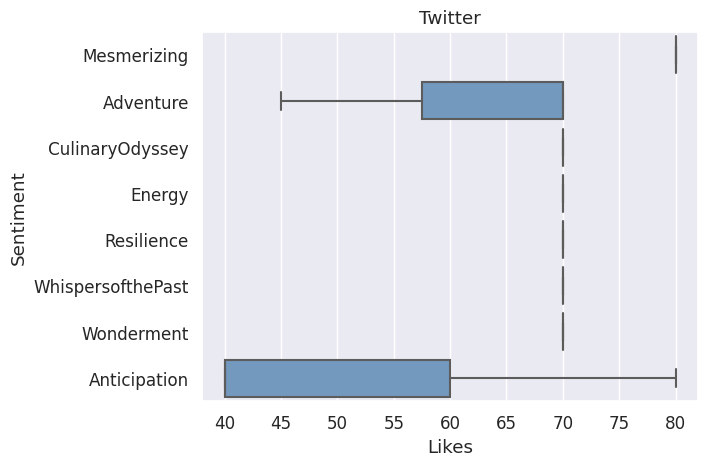

In [33]:
mean = mu
standard_deviation = std

distribution = norm(loc=mean, 
                    scale=standard_deviation)

len_sentiment = twitter.groupby('Sentiment').Likes.median().sort_values(ascending=False)
for sentiment, value in np.array([len_sentiment.index, len_sentiment.values]).T:
    if float(value) > distribution.ppf(0.9544):
        most_likes_sentiment['Twitter'].append(sentiment)
        
most_likes_sentiment_twitter = no_duplicated[no_duplicated['Sentiment'].isin(most_likes_sentiment['Twitter'])]
order_twitter = most_likes_sentiment_twitter.groupby(['Sentiment']).Likes.median().sort_values(ascending=False).index

g = sns.boxplot(data=most_likes_sentiment_twitter, y='Sentiment', x='Likes', 
                color='#6699CC', order=order_twitter)
plt.title('Twitter')
plt.show()

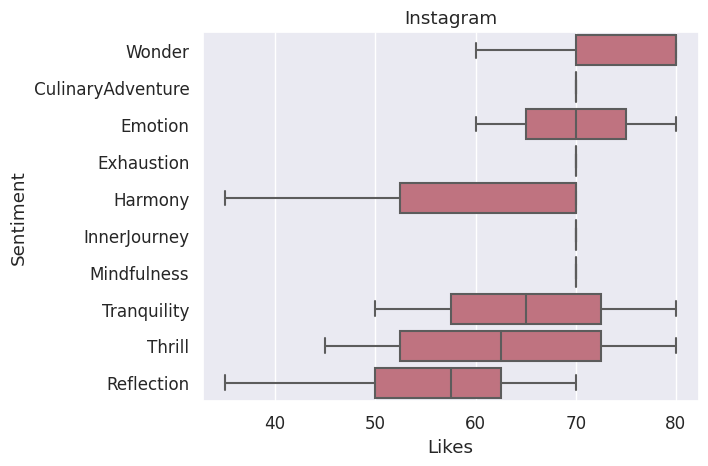

In [34]:
mu, std = norm.fit(instagram.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(instagram.groupby('Sentiment').Likes.median()), min(instagram.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

mean = mu
standard_deviation = std
distribution = norm(loc=mean, 
                    scale=standard_deviation)


len_sentiment = instagram.groupby('Sentiment').Likes.median().sort_values(ascending=False)
for sentiment, value in np.array([len_sentiment.index, len_sentiment.values]).T:
    if float(value) > distribution.ppf(0.9544):
        most_likes_sentiment['Instagram'].append(sentiment)
        
most_likes_sentiment_instagram = no_duplicated[no_duplicated['Sentiment'].isin(most_likes_sentiment['Instagram'])]
order_instagram = most_likes_sentiment_instagram.groupby(['Sentiment']).Likes.median().sort_values(ascending=False).index

g = sns.boxplot(data=most_likes_sentiment_instagram, y='Sentiment', x='Likes', 
                color='#CC6677', order=order_instagram)
plt.title('Instagram')
plt.show()

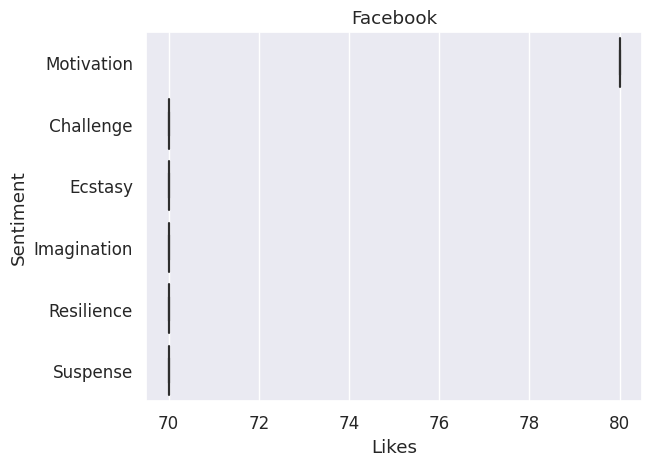

In [35]:
mu, std = norm.fit(facebook.groupby('Sentiment').Likes.median()) 
xmin, xmax = max(facebook.groupby('Sentiment').Likes.median()), min(facebook.groupby('Sentiment').Likes.median())
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

mean = mu
standard_deviation = std
distribution = norm(loc=mean, 
                    scale=standard_deviation)

len_sentiment = facebook.groupby('Sentiment').Likes.median().sort_values(ascending=False)
for sentiment, value in np.array([len_sentiment.index, len_sentiment.values]).T:
    if float(value) > distribution.ppf(0.9544):
        most_likes_sentiment['Facebook'].append(sentiment)
        
most_likes_sentiment_facebook = no_duplicated[no_duplicated['Sentiment'].isin(most_likes_sentiment['Facebook'])]
order_facebook = most_likes_sentiment_facebook.groupby(['Sentiment']).Likes.median().sort_values(ascending=False).index

g = sns.boxplot(data=most_likes_sentiment_facebook, y='Sentiment', x='Likes', 
                color='#997700', order=order_facebook)
plt.title('Facebook')
plt.show()

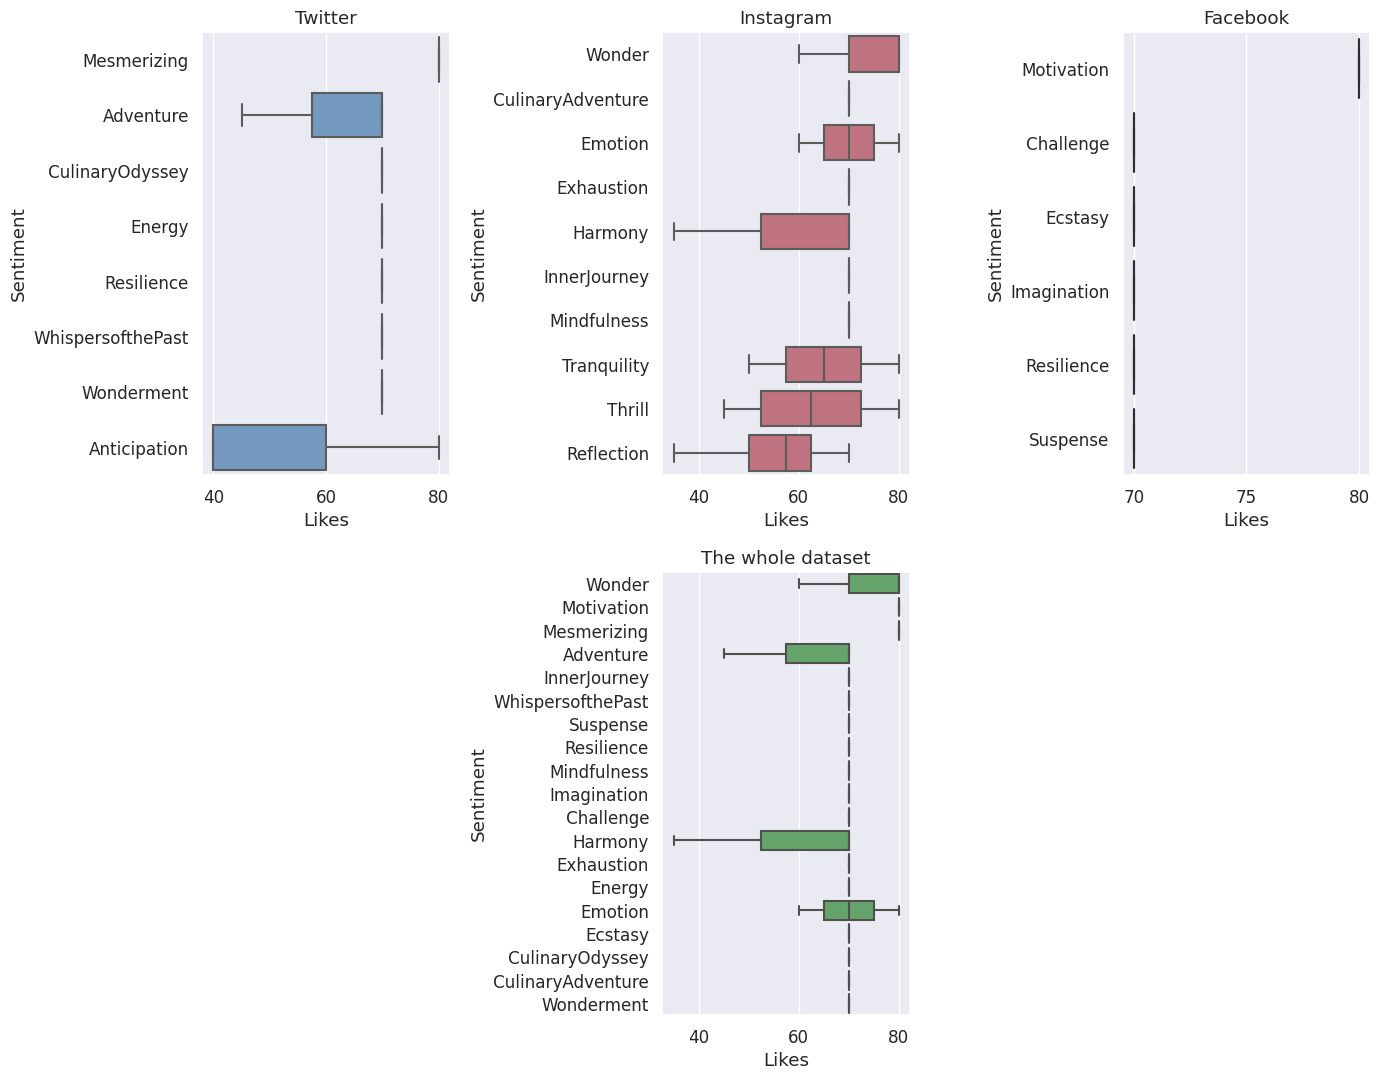

In [36]:
plt.figure(figsize=(14,11))
plt.subplot(2, 3, 1)
ax1 = sns.boxplot(data=most_likes_sentiment_twitter, y='Sentiment', x='Likes', 
                color='#6699CC', order=order_twitter)
ax1.set_title('Twitter')
###########################
plt.subplot(2, 3, 2)
ax2 = sns.boxplot(data=most_likes_sentiment_instagram, y='Sentiment', x='Likes', 
                color='#CC6677', order=order_instagram)
ax2.set_title('Instagram')
###########################
plt.subplot(2, 3, 3)
ax3 = sns.boxplot(data=most_likes_sentiment_facebook, y='Sentiment', x='Likes', 
                color='#997700', order=order_facebook)
ax3.set_title('Facebook')
###########################
plt.subplot(2, 3, 5)
ax4 = sns.boxplot(data=most_likes_sentiment_db, y='Sentiment', x='Likes', 
                    color='#5AAE61', order=order_whole)
ax4.set_title('The whole dataset')

plt.tight_layout()

In [37]:
for i in no_duplicated.index:
    text = no_duplicated.loc[i, "Text"].lower()
    emotion = NRCLex(text)
    positive_score = emotion.affect_frequencies['positive']
    negative_score = emotion.affect_frequencies['negative']
    #print("positive_score", positive_score, "negative_score", negative_score)
    if positive_score > negative_score:
        no_duplicated.loc[i, "Sentiment_NRC"] = "Positive"
    elif positive_score == negative_score:
        no_duplicated.loc[i, "Sentiment_NRC"] = "Neutral"
    else:
        no_duplicated.loc[i, "Sentiment_NRC"] = "Negative"

In [38]:
no_duplicated.groupby('Sentiment_NRC').Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Sentiment_NRC,,,
Neutral,693,10.0,80.0
Negative,9,20.0,50.0
Positive,7,40.0,50.0


In [39]:
twitter = no_duplicated[no_duplicated["Platform"] == 'Twitter']
instagram = no_duplicated[no_duplicated["Platform"] == 'Instagram']
facebook = no_duplicated[no_duplicated["Platform"] == 'Facebook']

In [40]:
twitter.groupby('Sentiment_NRC').Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Sentiment_NRC,,,
Neutral,233,10.0,80.0
Negative,3,30.0,32.0


In [41]:
instagram.groupby('Sentiment_NRC').Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Sentiment_NRC,,,
Neutral,242,15.0,80.0
Negative,4,20.0,50.0
Positive,4,42.0,50.0


In [42]:
facebook.groupby('Sentiment_NRC').Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Sentiment_NRC,,,
Neutral,218,15.0,80.0
Positive,3,40.0,50.0
Negative,2,32.0,36.0


<Axes: xlabel='Likes', ylabel='Sentiment_NRC'>

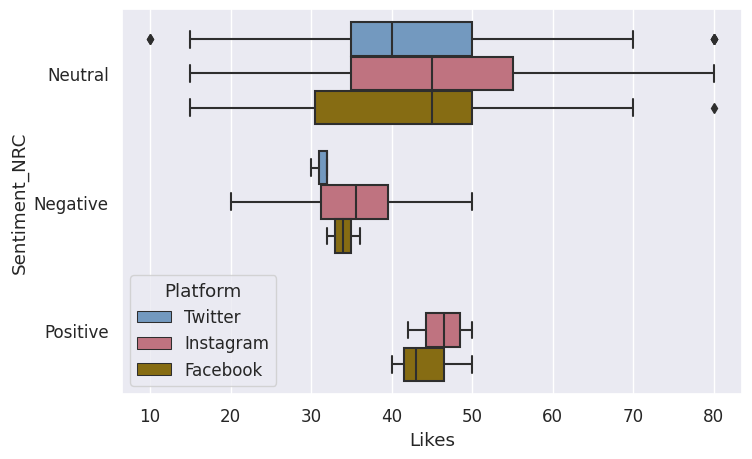

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(data=no_duplicated, x='Likes', y='Sentiment_NRC', 
            hue='Platform', palette={"Twitter": "#6699CC", "Instagram": "#CC6677", "Facebook": "#997700"})

<a id="subsection-five-of-section-3" ></a>
## 5. Do people post more often positive, negative or neutral text?

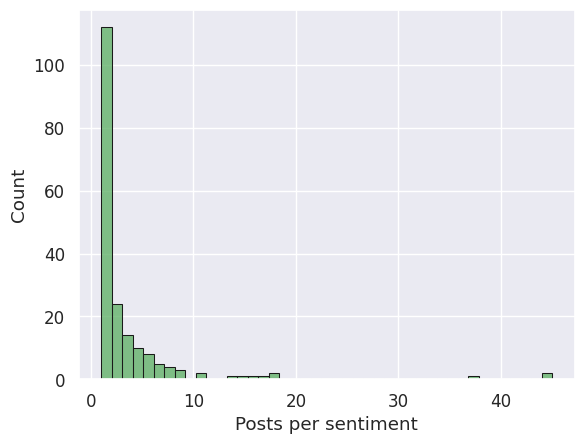

In [44]:
sns.histplot(no_duplicated.groupby('Sentiment').Likes.agg(len), 
             color='#5AAE61', edgecolor='k',
            # stat = 'probability'
            )
plt.xlabel('Posts per sentiment')
plt.show()

In [45]:
no_duplicated.groupby('Sentiment').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(23)

,len,min,max
Sentiment,,,
Positive,45,15.0,60.0
Joy,44,30.0,80.0
Excitement,37,30.0,80.0
Contentment,18,35.0,70.0
Neutral,18,25.0,50.0
Gratitude,17,30.0,70.0
Curiosity,16,30.0,60.0
Serenity,15,25.0,55.0
Happy,14,38.0,52.0


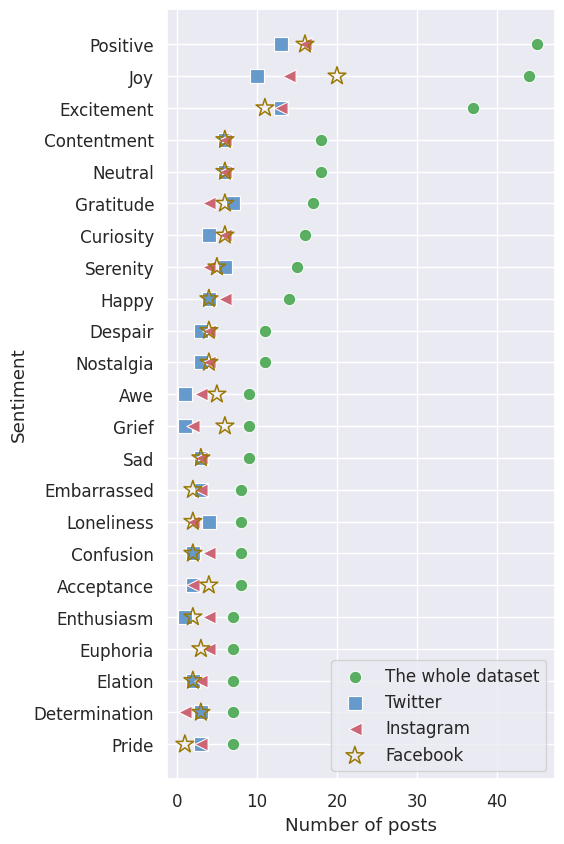

In [46]:
plt.figure(figsize=(5,10))
emotions = no_duplicated.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).head(23).index
most_posted_emotions = no_duplicated[no_duplicated['Sentiment'].isin(emotions)]
ax1 = sns.scatterplot(y=most_posted_emotions.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).index,
              x=most_posted_emotions.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).values, 
              color='#5AAE61', 
              s=80, 
              label='The whole dataset'
             )

emotions_twitter = twitter.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).head(23).index
most_posted_emotions_twitter = twitter[twitter['Sentiment'].isin(emotions)]
ax2 = sns.scatterplot(y=most_posted_emotions_twitter.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).index,
              x=most_posted_emotions_twitter.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).values, 
              color='#6699CC', 
              s=110, 
              marker='s', 
              label='Twitter'
             )


emotions_instagram = instagram.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).head(23).index
most_posted_emotions_instagram = instagram[instagram['Sentiment'].isin(emotions)]
ax3 = sns.scatterplot(y=most_posted_emotions_instagram.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).index,
              x=most_posted_emotions_instagram.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).values, 
              color='#CC6677', 
              s=90, 
              marker='<', 
              label='Instagram'
             )

emotions_facebook = facebook.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).head(23).index
most_posted_emotions_facebook = facebook[facebook['Sentiment'].isin(emotions)]
ax4 = sns.scatterplot(y=most_posted_emotions_facebook.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).index,
              x=most_posted_emotions_facebook.groupby('Sentiment').Likes.agg(len).sort_values(ascending=False).values, 
              color='#997700', 
              s=180,
              marker='*', 
              facecolors = 'none',
              edgecolor = '#997700',
              label='Facebook'
             )
plt.xlabel('Number of posts')
plt.legend()
plt.show()